In [5]:

import netCDF4 as nc
import numpy as np
import xarray as xr

viirs_geo = xr.open_dataset('data/VJ103MOD.A2018312.2036.021.2021034154726.nc')
viirs_geo

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/69)
    title:                             VIIRS M-band Geolocation Data
    platform:                          JPSS-1
    instrument:                        VIIRS
    product_name:                      VJ103MOD.A2018312.2036.021.20210341547...
    LocalGranuleID:                    VJ103MOD.A2018312.2036.021.20210341547...
    LongName:                          VIIRS/JPSS1 Moderate Resolution Terrai...
    ...                                ...
    identifier_product_doi_authority:  https://doi.org
    ProcessingEnvironment:             Linux minion7548 3.10.0-1127.18.2.el7....
    InputPointer:                      VJ101.A2018312.2036.021.2021034130132....
    RangeBeginningTime:                20:36:00.000000
    AlgorithmVersion:                  NPP_PR03_VCST v3.0.0
    identifier_product_doi:            10.5067/VIIRS/VJ103MOD.021

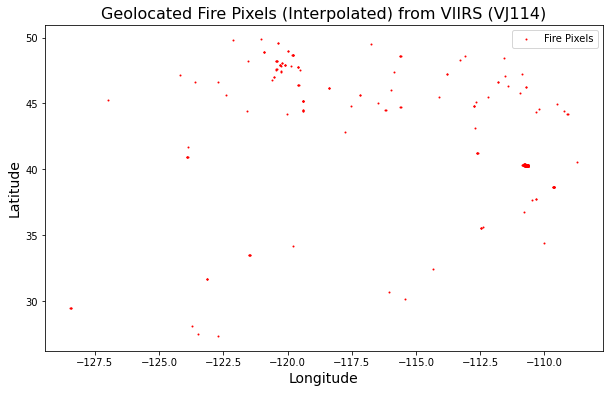

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Step 1: Load the VIIRS fire detection file
fire_file = 'data/VJ114.A2018312.2036.002.2022294181925.nc'
fire_data = xr.open_dataset(fire_file)

# Step 2: Define the bounding box coordinates from the geolocation file
lat_min = 24.56887
lat_max = 49.92521
lon_min = -137.86559
lon_max = -97.05113

# Extract fire mask data (assuming 'fire_mask' is the correct variable name)
fire_mask = fire_data['fire mask'][:].values  # Replace with actual fire mask variable if different

# Get the shape of the fire mask (rows, cols)
nrows, ncols = fire_mask.shape

# Step 3: Interpolate latitude and longitude using the bounding box
# Generate a grid of latitudes and longitudes that matches the dimensions of the fire mask
latitudes = np.linspace(lat_min, lat_max, nrows)[:, np.newaxis]
longitudes = np.linspace(lon_min, lon_max, ncols)[np.newaxis, :]

# Create a meshgrid to match the fire_mask shape
latitude_grid = np.tile(latitudes, (1, ncols))
longitude_grid = np.tile(longitudes, (nrows, 1))

# Step 4: Filter fire pixels with fire mask values 7, 8, and 9
fire_pixels_mask = (fire_mask == 7) | (fire_mask == 8) | (fire_mask == 9)

# Get latitudes and longitudes of fire pixels
fire_latitudes = latitude_grid[fire_pixels_mask]
fire_longitudes = longitude_grid[fire_pixels_mask]

# Step 5: Plot the fire pixel locations
plt.figure(figsize=(10, 6))
plt.scatter(fire_longitudes, fire_latitudes, color='red', s=1, label='Fire Pixels')

# Add plot labels and title
plt.title('Geolocated Fire Pixels (Interpolated) from VIIRS (VJ114)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Show the plot
plt.legend()
plt.show()


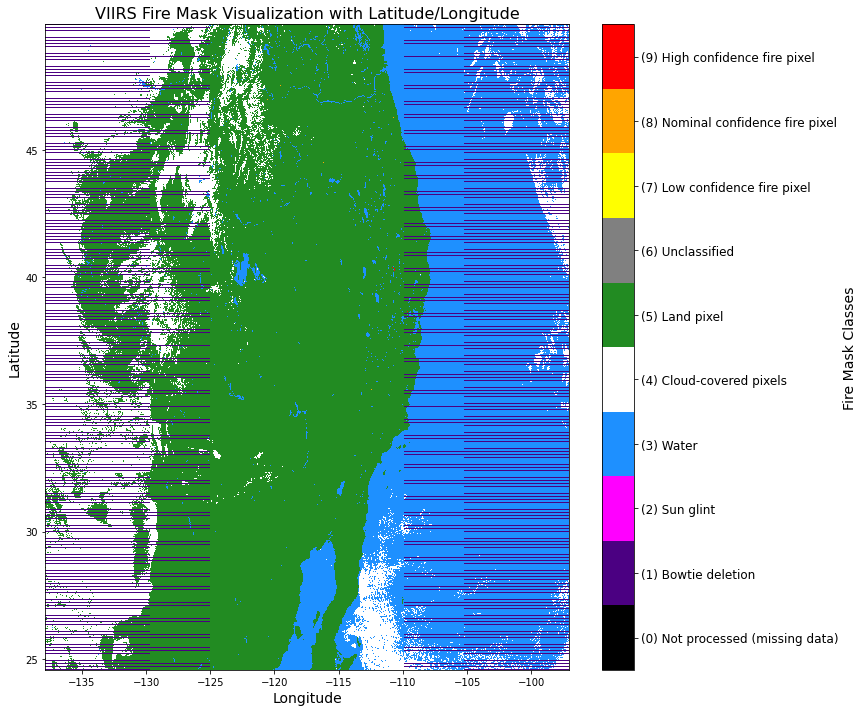

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# Define class names and distinct colors for the fire mask
class_names = {
    0: '(0) Not processed (missing data)',
    1: '(1) Bowtie deletion',
    2: '(2) Sun glint',
    3: '(3) Water',
    4: '(4) Cloud-covered pixels',
    5: '(5) Land pixel',
    6: '(6) Unclassified',
    7: '(7) Low confidence fire pixel',
    8: '(8) Nominal confidence fire pixel',
    9: '(9) High confidence fire pixel'
}

distinct_colors = [
    '#000000',  # Black for not processed (missing data)
    '#4B0082',  # Indigo for bowtie deletion
    '#FF00FF',  # Magenta for sun glint
    '#1E90FF',  # DodgerBlue for water
    '#FFFFFF',  # White for cloud-covered pixels
    '#228B22',  # ForestGreen for non-fire land pixel
    '#808080',  # Gray for unclassified
    '#FFFF00',  # Yellow for low confidence fire pixel
    '#FFA500',  # Orange for nominal confidence fire pixel
    '#FF0000'   # Red for high confidence fire pixel
]

# Step 1: Load the VIIRS fire detection file
#fire_file = 'VJ114.A2018312.2036.002.2022294181925.nc'
fire_data = xr.open_dataset(fire_file)

# Extract fire mask data
fire_mask = fire_data['fire mask'][:].values  # Replace with actual fire mask variable if different
nrows, ncols = fire_mask.shape

# Step 2: Define the bounding box coordinates from the geolocation file
lat_min = 24.56887
lat_max = 49.92521
lon_min = -137.86559
lon_max = -97.05113

# Step 3: Interpolate latitude and longitude using the bounding box
latitudes = np.linspace(lat_min, lat_max, nrows)[:, np.newaxis]
longitudes = np.linspace(lon_min, lon_max, ncols)[np.newaxis, :]

# Create a meshgrid of latitudes and longitudes
latitude_grid = np.tile(latitudes, (1, ncols))
longitude_grid = np.tile(longitudes, (nrows, 1))

# Step 4: Define the custom colormap for the fire mask
cmap = ListedColormap(distinct_colors)
bounds = np.arange(11) - 0.5  # Define boundaries for the colormap
norm = BoundaryNorm(bounds, cmap.N)

# Step 5: Plot the fire mask data using latitude and longitude
plt.figure(figsize=(12, 10))

# Use pcolormesh to map the fire mask values onto the latitude/longitude grid
img = plt.pcolormesh(longitude_grid, latitude_grid, fire_mask, cmap=cmap, norm=norm)

# Add colorbar with class labels
cbar = plt.colorbar(img, label='Fire Mask Classes', ticks=range(10))
cbar.set_ticklabels([class_names[i] for i in range(10)])
cbar.ax.tick_params(labelsize=12)  # Increase label size
cbar.set_label('Fire Mask Classes', size=14)  # Increase colorbar title size

# Add labels and title
plt.title('VIIRS Fire Mask Visualization with Latitude/Longitude', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

# Adjust layout to prevent cutting off colorbar labels
plt.tight_layout()

# Show the plot
plt.show()
